In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

In [99]:
df = pd.read_csv('courses.csv')
df.head()

,Course,ID,Department
0,Principles of Nutrition,BIOL,Biology
1,Nutrition for Fitness and Physical Activity,BIOL,Biology
2,Introduction to Human Physiology,BIOL,Biology
3,Biotechnology Management,BIOL,Biology
4,Living Biology at Brown and Beyond,BIOL,Biology


In [100]:
department_mapping = {
    'History': 'History & Social Sciences',
    'Political Science': 'History & Social Sciences',
    'International and Public Affairs': 'History & Social Sciences',
    'Sociology': 'History & Social Sciences',
    'Anthropology': 'History & Social Sciences',
    'Africana Studies': 'History & Social Sciences',
    'Public Health': 'History & Social Sciences',
    'Economics': 'History & Social Sciences',
    'Education': 'History & Social Sciences',
    'Gender and Sexuality Studies': 'History & Social Sciences',
    'Urban Studies': 'History & Social Sciences',

    'Mathematics': 'STEM',
    'Applied Mathematics': 'STEM',
    'Physics': 'STEM',
    'Engineering': 'STEM',
    'Computer Science': 'STEM',
    'Biology': 'STEM',
    'Neuroscience': 'STEM',
    'Chemistry': 'STEM',
    'Geology': 'STEM',
    'Data Science': 'STEM',
    'Environmental Studies': 'STEM',

    'Modern Culture and Media': 'Arts & Media',
    'Music': 'Arts & Media',
    'Theater and Performance': 'Arts & Media',
    'Visual Art': 'Arts & Media',
    'Art History': 'Arts & Media',
    'Arts Institute': 'Arts & Media',
    'English': 'Arts & Media',
    'Comparative Literature': 'Arts & Media',

    'Philosophy': 'Philosophy & Religion',
    'Religious Studies': 'Philosophy & Religion',
    'Contemplative Studies': 'Philosophy & Religion',
    'Judaic Studies': 'Philosophy & Religion',

    'Latin': 'Languages',
    'Ancient Greek': 'Languages',
    'German': 'Languages',
    'Russian': 'Languages',
    'Italian': 'Languages',
    'Portuguese and Brazilian Studies': 'Languages',
    'East Asian Studies': 'Languages',
    'Chinese': 'Languages',
    'Japanese': 'Languages',
    'Korean': 'Languages',
    'Hindi-Urdu': 'Languages',
    'Arabic': 'Languages',
    'Sanskrit': 'Languages',
    'Persian': 'Languages',
    'Swedish': 'Languages',
    'Catalan': 'Languages',
    'Vietnamese': 'Languages',
    'Polish': 'Languages',
    'Hebrew': 'Languages',
    'Turkish': 'Languages',
    'Yoruba': 'Languages',
    'Czech': 'Languages',
    'Language Studies': 'Languages',
    'Native American Studies': 'Languages',

    'Egyptology': 'Ancient Studies',
    'Assyriology': 'Ancient Studies',
    'Classics': 'Ancient Studies',
    'Archaeology': 'Ancient Studies',
    'Early Cultures': 'Ancient Studies',
    'Medeival Studies': 'Ancient Studies',

    'Other': 'Other'
}

In [101]:
df['Department_Grouped'] = df['Department'].map(department_mapping).fillna('Other')

In [102]:
text = df['Course']
labels_text = df['Department_Grouped']

In [103]:
text_list = text.tolist()
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
encoded = tokenizer(text_list, padding=True, return_tensors='np')
sequences = encoded['input_ids']
print(sequences.shape)
max_length = sequences.shape[1]

(6690, 26)


In [104]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels_text)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=17)

In [106]:
model = TFAutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=len(label_encoder.classes_))

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [107]:
model.distilbert.trainable = False
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=5e-5),
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
               metrics=['accuracy'])

In [108]:
model.summary()

Model: "tf_distil_bert_for_sequence_classification_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMa  multiple                  66362880  
 inLayer)                                                        
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  5383      
                                                                 
 dropout_535 (Dropout)       multiple                  0 (unused)
                                                                 
Total params: 66958855 (255.43 MB)
Trainable params: 595975 (2.27 MB)
Non-trainable params: 66362880 (253.15 MB)
_________________________________________________________________


In [109]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001, restore_best_weights=True)

In [110]:
history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=25, batch_size=32, callbacks=[early_stopping])

Epoch 1/25
168/168 [==============================] - 41s 232ms/step - loss: 1.7501 - accuracy: 0.3498 - val_loss: 1.6463 - val_accuracy: 0.4806
Epoch 2/25
168/168 [==============================] - 38s 225ms/step - loss: 1.6022 - accuracy: 0.4871 - val_loss: 1.5085 - val_accuracy: 0.5075
Epoch 3/25
168/168 [==============================] - 39s 230ms/step - loss: 1.4727 - accuracy: 0.5107 - val_loss: 1.3876 - val_accuracy: 0.5314
Epoch 4/25
168/168 [==============================] - 39s 231ms/step - loss: 1.3780 - accuracy: 0.5286 - val_loss: 1.3079 - val_accuracy: 0.5471
Epoch 5/25
168/168 [==============================] - 39s 230ms/step - loss: 1.3182 - accuracy: 0.5435 - val_loss: 1.2506 - val_accuracy: 0.5575
Epoch 6/25
168/168 [==============================] - 38s 224ms/step - loss: 1.2702 - accuracy: 0.5516 - val_loss: 1.2137 - val_accuracy: 0.5747
Epoch 7/25
168/168 [==============================] - 38s 226ms/step - loss: 1.2304 - accuracy: 0.5684 - val_loss: 1.1845 - val_ac

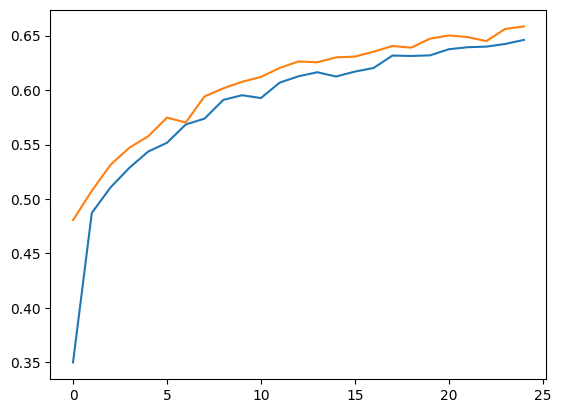

In [111]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

In [ ]:
predict_text = ["Computational Statistics"]

predict_seq = tokenizer(predict_text, padding='max_length', max_length=max_length, return_tensors="np")['input_ids']
predictions = model.predict(predict_seq)

# Print probability diestribution
predictions = pd.DataFrame(predictions, columns=label_encoder.classes_)
pred_series = predictions
print(predictions)
top_5 = pred_series.sort_values(ascending=False).head(5)
print("Top 5 Predicted Departments:")
for dept, prob in top_5.items():
    print(f"{dept}: {prob:.4f}")

predicted_labels = np.argmax(predictions, axis=1)
predicted_labels_text = label_encoder.inverse_transform(predicted_labels)
for text, label in zip(predict_text, predicted_labels_text):
    print(f"Text: {text} => Predicted Label: {label}")

1/1 [==============================] - 0s 134ms/step


TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'